# Training a basic setting with a Deep Q Network (DQN) #

Import statements

In [25]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD

In [3]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory  # For experience replay!

In [4]:
from gym_environment_ncml import GridworldMultiAgent
from learning import *

pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


Useful numbers

In [5]:
MILLION = 1000000
HTHOUSAND = 100000
THOUSAND = 1000

## 1. Create environment ##

In [6]:
env = GridworldMultiAgent()

In [7]:
states = env.observation_space.shape[0]
actions = env.action_space.n

In [8]:
states, actions

(8, 25)

## 2. Create a Deep Learning Model with Keras ##

In [9]:
model = build_model(states, actions, [30, 30], ['relu', 'relu'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                775       
Total params: 1,975
Trainable params: 1,975
Non-trainable params: 0
_________________________________________________________________


## 3. Build Agent with Keras-RL ##

In [11]:
dqn = build_agent(model, actions, 0.01, BoltzmannQPolicy(), 50000)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
# dqn.compile(Adam(lr=1e-2), metrics=['mse'])

In [17]:
history = dqn.fit(env, nb_steps=20*THOUSAND, visualize=False, verbose=1)

Training for 20000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 60s 6ms/step - reward: -0.0950
200 episodes - episode_reward: -4.750 [-50.000, 70.000] - loss: 35.396 - mae: 48.326 - mean_q: 54.405

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 64s 6ms/step - reward: -0.0430
done, took 124.039 seconds


In [18]:
history.history

{'episode_reward': [10.0,
  -50.0,
  -20.0,
  0.0,
  0.0,
  -10.0,
  -40.0,
  0.0,
  -10.0,
  40.0,
  0.0,
  -30.0,
  -40.0,
  -30.0,
  -10.0,
  -40.0,
  0.0,
  40.0,
  -30.0,
  0.0,
  10.0,
  -10.0,
  0.0,
  -20.0,
  -20.0,
  -50.0,
  0.0,
  -30.0,
  -30.0,
  -10.0,
  -10.0,
  -40.0,
  -20.0,
  10.0,
  -30.0,
  -10.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -30.0,
  -10.0,
  -30.0,
  -10.0,
  -10.0,
  0.0,
  0.0,
  -10.0,
  -50.0,
  20.0,
  -40.0,
  -30.0,
  30.0,
  10.0,
  10.0,
  -30.0,
  -10.0,
  0.0,
  0.0,
  -40.0,
  -50.0,
  40.0,
  20.0,
  -10.0,
  30.0,
  -20.0,
  50.0,
  -20.0,
  -30.0,
  -10.0,
  0.0,
  0.0,
  -20.0,
  20.0,
  0.0,
  -20.0,
  -20.0,
  -20.0,
  -40.0,
  10.0,
  -30.0,
  -50.0,
  -50.0,
  -20.0,
  -20.0,
  20.0,
  -30.0,
  -10.0,
  -20.0,
  -40.0,
  -10.0,
  -10.0,
  -10.0,
  -40.0,
  -40.0,
  -10.0,
  -20.0,
  -50.0,
  10.0,
  20.0,
  30.0,
  0.0,
  -10.0,
  -30.0,
  -50.0,
  0.0,
  0.0,
  50.0,
  -30.0,
  20.0,
  0.0,
  20.0,
  -50.0,
  40.0,
  10.0,
  -20.0,
  -20.0,

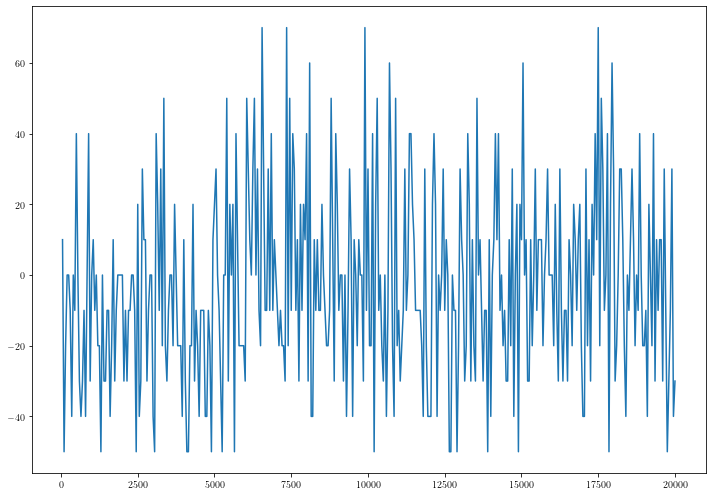

In [26]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(history.history['nb_steps'], history.history['episode_reward'])

fig.tight_layout()
plt.show()

In [ ]:
scores = dqn.test(env, nb_episodes=10, visualize=False)
print(np.mean(scores.history['episode_reward']))

Save agent to memory

In [ ]:
dqn.save_weights('agents/dqn_5b5_3030_adam_lr0.001_tmu0.01_ml50K_ns5M.h5f', overwrite=True)

## 4. Reloading Agent from Memory ##